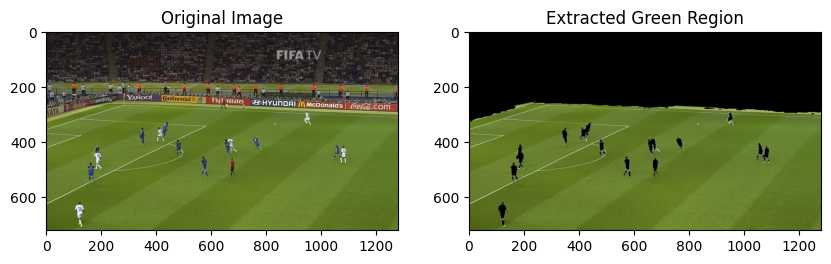

True

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = './assets/world_cup_2006.png'
image = cv2.imread(image_path)

# Convert the image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range of green color in HSV
lower_green = np.array([35, 40, 40])
upper_green = np.array([85, 255, 255])

# Threshold the HSV image to get only green colors
mask = cv2.inRange(hsv, lower_green, upper_green)

# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty mask to draw the largest contour
largest_contour_mask = np.zeros_like(mask)

# Find the largest contour based on area
if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    cv2.drawContours(largest_contour_mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

# Bitwise-AND the largest contour mask with the original mask
final_mask = cv2.bitwise_and(mask, largest_contour_mask)

# Bitwise-AND final mask and original image to extract the green region
green_region = cv2.bitwise_and(image, image, mask=final_mask)

# Display the original image and the extracted green region
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Extracted Green Region')
plt.imshow(cv2.cvtColor(green_region, cv2.COLOR_BGR2RGB))

plt.show()

# Saving the Green Region Image
cv2.imwrite('./assets/green_region.png', green_region)